In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf


In [2]:
Directory = "Desktop/chest_xray/train/"
print(len(Directory))

25


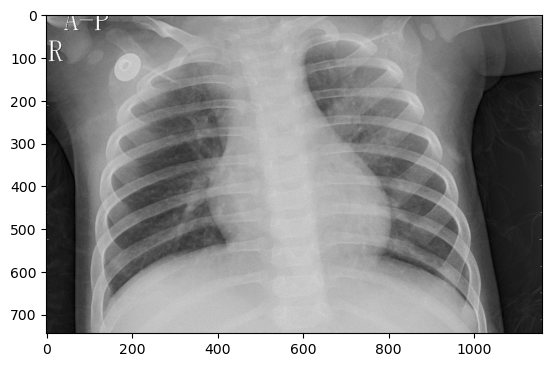

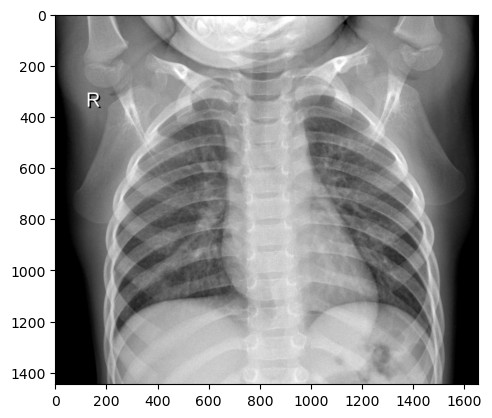

In [3]:
categories = ["PNEUMONIA","NORMAL"]


for category in categories:
    path = os.path.join(Directory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    


In [4]:
print(img_array.shape)

(1446, 1654, 3)


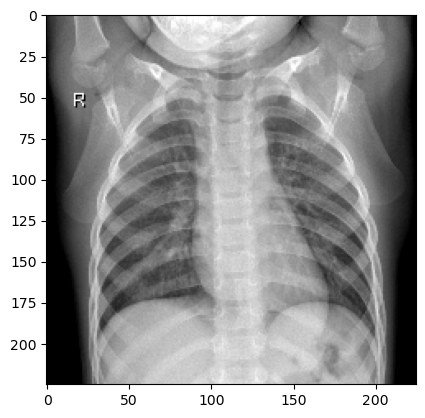

225


In [5]:
img_size = 225
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array)
plt.show()
print(len(new_array))

In [6]:
new_array.shape

(225, 225, 3)

In [7]:
training_data = []

def createtraining_data():
    for category in categories:
        path = os.path.join(Directory, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
            
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

        
createtraining_data()

        
        

In [8]:
print(len(training_data))

3218


In [9]:
import random

random.shuffle(training_data)

In [10]:
x = []
y = []

In [11]:
for features , label in training_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1,img_size,img_size ,3)


In [12]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

Using TensorFlow backend.


In [13]:
x = np.array(x)
y = np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 17)



from keras.optimizers import SGD



In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (img_size,img_size,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model.fit(x_train,y_train,validation_split = 0.1,batch_size = 128 , epochs = 15)
score = model.evaluate(x_test,y_test,batch_size = 128)





Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 225, 225, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 225, 225, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 110, 110, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 55, 55, 32)       

In [24]:

print('test accuracy :',score [1])



test accuracy : 0.8773291707038879


In [25]:
predictions = model.predict(x_test)

In [26]:
predictions

array([[9.99982119e-01],
       [6.99106872e-01],
       [7.31226921e-01],
       [9.98981297e-01],
       [9.99981761e-01],
       [5.27769327e-04],
       [9.30923998e-01],
       [6.26901984e-02],
       [9.59323168e-01],
       [5.53117096e-01],
       [9.47550356e-01],
       [9.63035107e-01],
       [9.91944075e-01],
       [8.82288814e-03],
       [1.54868066e-02],
       [3.32143903e-03],
       [3.52993459e-01],
       [3.53938341e-03],
       [3.05556566e-01],
       [9.99997616e-01],
       [3.06963921e-04],
       [5.38784862e-01],
       [8.92172933e-01],
       [9.40752506e-01],
       [9.86499965e-01],
       [7.37806380e-01],
       [4.60764468e-02],
       [0.00000000e+00],
       [1.00000000e+00],
       [3.12589377e-01],
       [1.21797949e-01],
       [1.36435032e-04],
       [5.09963751e-01],
       [8.28856230e-03],
       [8.57642949e-01],
       [8.58575106e-04],
       [9.77135479e-01],
       [9.98344183e-01],
       [9.01270390e-01],
       [5.49859762e-01],


In [50]:
import os.path
model.save("prediction_pneumonia.h5")

In [51]:
from tensorflow.keras.models import load_model
new_model = load_model("prediction_pneumonia.h5")